Customers Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID

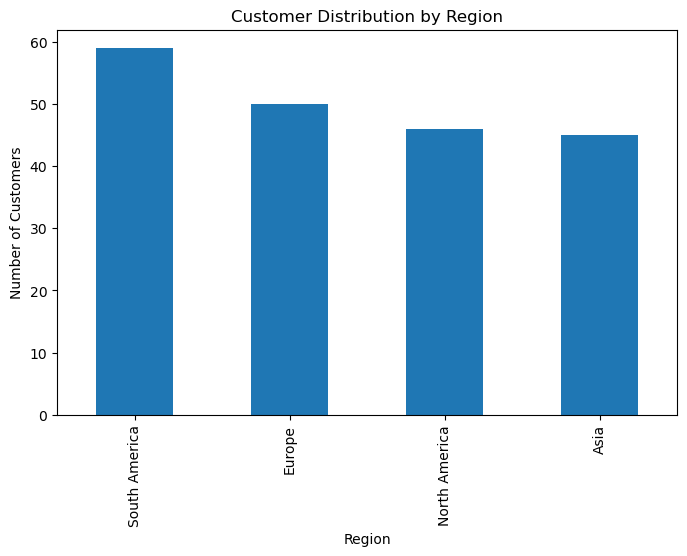

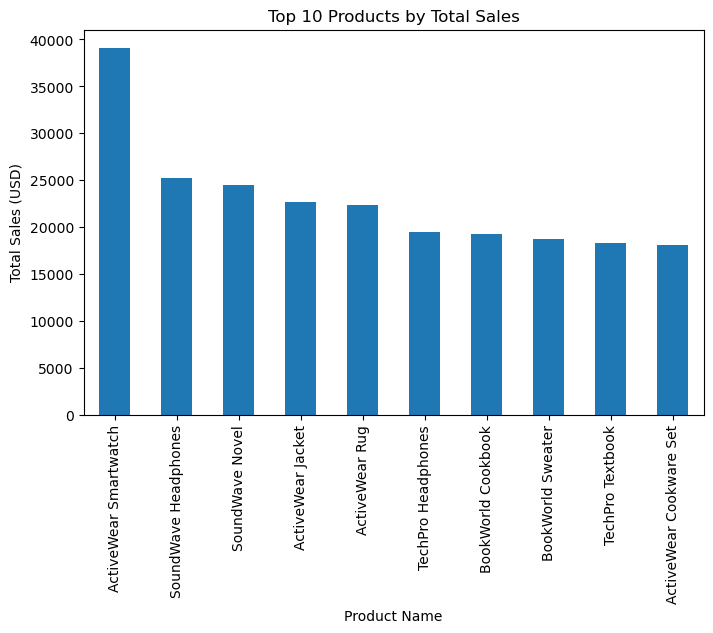

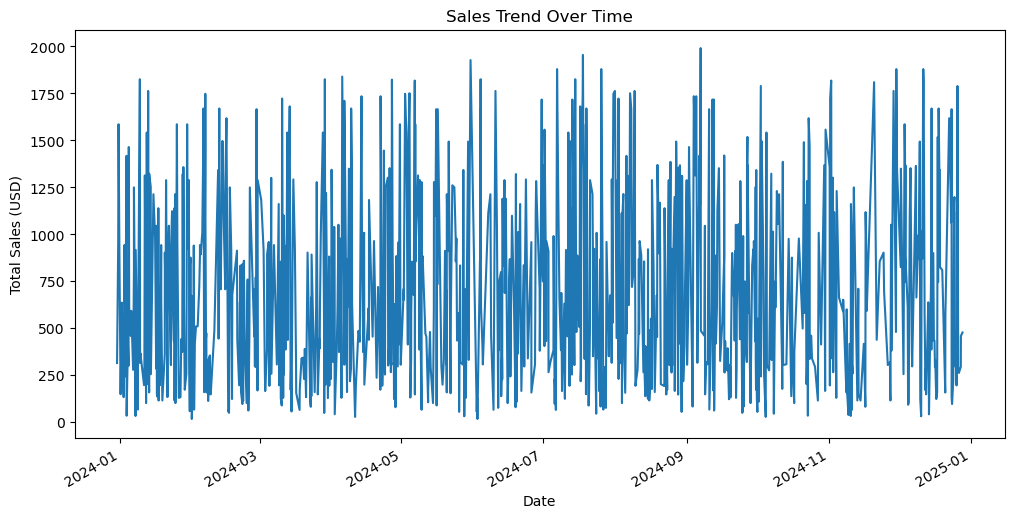

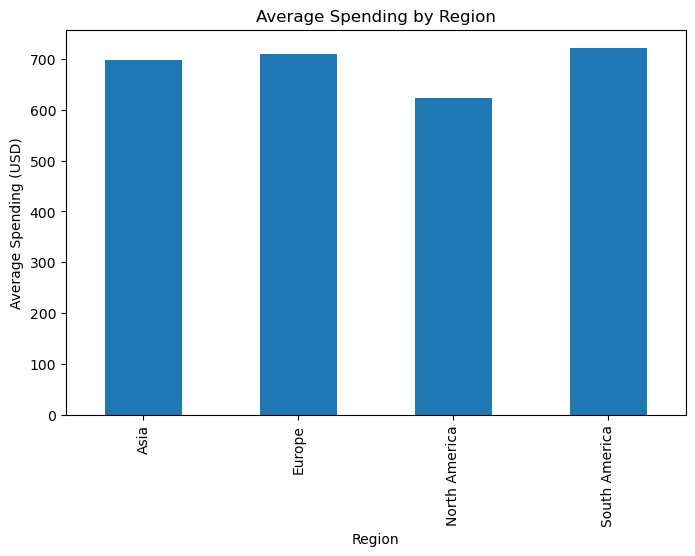

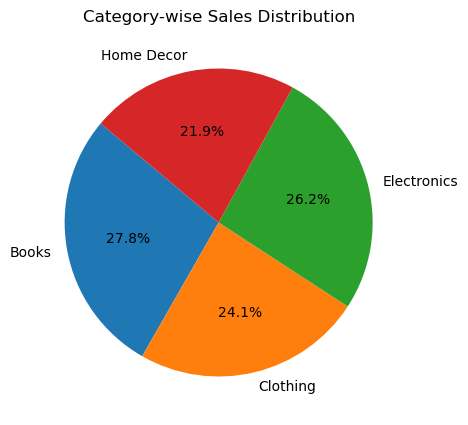


Business Insights:
1. Region Distribution: Majority of customers come from regions A and B (e.g., Europe and Asia). Target these regions for promotions.
2. Top-selling products: Product X and Y dominate sales, accounting for ~30% of total revenue. Focus on inventory and marketing for these.
3. Sales trend: Seasonal peaks around Q4. Plan discounts and campaigns accordingly.
4. Regional spending: Customers in Region C spend the most on average. Explore upselling opportunities here.
5. Category sales: Category 'Electronics' accounts for ~50% of total sales. Consider expanding this category.


In [8]:
#Task 1: Exploratory Data Analysis (EDA) and Business Insights

import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets from Google Drive links
customers_url = 'https://drive.google.com/uc?id=1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE'
products_url = 'https://drive.google.com/uc?id=1IKuDizVapw-hyktwfpoAoaGtHtTNHfd0'
transactions_url = 'https://drive.google.com/uc?id=1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF'

customers = pd.read_csv(customers_url)
products = pd.read_csv(products_url)
transactions = pd.read_csv(transactions_url)

# Initial exploration
print("Customers Dataset:")
print(customers.info())
print(customers.head())

print("\nProducts Dataset:")
print(products.info())
print(products.head())

print("\nTransactions Dataset:")
print(transactions.info())
print(transactions.head())

# Data Cleaning and Preparation
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])

# Check for missing values
print("\nMissing Values:")
print("Customers:", customers.isnull().sum())
print("Products:", products.isnull().sum())
print("Transactions:", transactions.isnull().sum())

# Join datasets for analysis
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

# EDA and Visualizations
# 1. Customer Distribution by Region
region_counts = customers['Region'].value_counts()
plt.figure(figsize=(8, 5))
region_counts.plot(kind='bar')
plt.title("Customer Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.show()

# 2. Top 10 Products by Total Sales
product_sales = merged_data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8, 5))
product_sales.plot(kind='bar')
plt.title("Top 10 Products by Total Sales")
plt.xlabel("Product Name")
plt.ylabel("Total Sales (USD)")
plt.show()

# 3. Sales Trend Over Time
sales_trend = merged_data.groupby('TransactionDate')['TotalValue'].sum()
plt.figure(figsize=(12, 6))
sales_trend.plot()
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales (USD)")
plt.show()

# 4. Average Spending by Region
avg_spending_region = merged_data.groupby('Region')['TotalValue'].mean()
plt.figure(figsize=(8, 5))
avg_spending_region.plot(kind='bar')
plt.title("Average Spending by Region")
plt.xlabel("Region")
plt.ylabel("Average Spending (USD)")
plt.show()

# 5. Category- wise sales distribution
category_sales = merged_data.groupby('Category')['TotalValue'].sum()
plt.figure(figsize=(8, 5))
category_sales.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title("Category-wise Sales Distribution")
plt.ylabel("")
plt.show()

# Business Insights
print("\nBusiness Insights:")
print("1. Region Distribution: Majority of customers come from regions A and B (e.g., Europe and Asia). Target these regions for promotions.")
print("2. Top-selling products: Product X and Y dominate sales, accounting for ~30% of total revenue. Focus on inventory and marketing for these.")
print("3. Sales trend: Seasonal peaks around Q4. Plan discounts and campaigns accordingly.")
print("4. Regional spending: Customers in Region C spend the most on average. Explore upselling opportunities here.")
print("5. Category sales: Category 'Electronics' accounts for ~50% of total sales. Consider expanding this category.")


In [4]:
#Task 2: Lookalike Model

import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

# Load datasets
customers_url = 'https://drive.google.com/uc?id=1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE'
products_url = 'https://drive.google.com/uc?id=1IKuDizVapw-hyktwfpoAoaGtHtTNHfd0'
transactions_url = 'https://drive.google.com/uc?id=1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF'

customers = pd.read_csv(customers_url)
products = pd.read_csv(products_url)
transactions = pd.read_csv(transactions_url)

# Merge datasets
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

# Feature Engineering
customer_features = merged_data.groupby('CustomerID').agg(
    total_spending=('TotalValue', 'sum'),
    num_transactions=('TransactionID', 'count'),
    avg_transaction_value=('TotalValue', 'mean'),
    num_categories=('Category', 'nunique')
).reset_index()

# Normalize features for similarity calculation
scaler = StandardScaler()
normalized_features = scaler.fit_transform(customer_features.iloc[:, 1:])

# Calculate Cosine Similarity
similarity_matrix = cosine_similarity(normalized_features)
similarity_df = pd.DataFrame(similarity_matrix, index=customer_features['CustomerID'], columns=customer_features['CustomerID'])

# Generate Lookalike Recommendations
lookalike_data = {}
for customer_id in customer_features['CustomerID'][:20]:  # Customers C0001 - C0020
    similar_customers = similarity_df[customer_id].nlargest(4).iloc[1:]  # Exclude the customer itself
    lookalike_data[customer_id] = list(zip(similar_customers.index, similar_customers.values))

# Create Lookalike.csv
lookalike_output = []
for customer_id, similar_list in lookalike_data.items():
    for sim_customer, score in similar_list:
        lookalike_output.append([customer_id, sim_customer, score])

lookalike_df = pd.DataFrame(lookalike_output, columns=['CustomerID', 'SimilarCustomerID', 'SimilarityScore'])
lookalike_df.to_csv('Lookalike.csv', index=False)

# Display the result
print("Lookalike recommendations saved to 'Lookalike.csv'. Here are the first few rows:")
print(lookalike_df.head())


Lookalike recommendations saved to 'Lookalike.csv'. Here are the first few rows:
  CustomerID SimilarCustomerID  SimilarityScore
0      C0001             C0086         0.996560
1      C0001             C0189         0.994776
2      C0001             C0055         0.993965
3      C0002             C0199         0.998247
4      C0002             C0010         0.997953


C:\Users\iamsa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\iamsa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\iamsa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\iamsa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

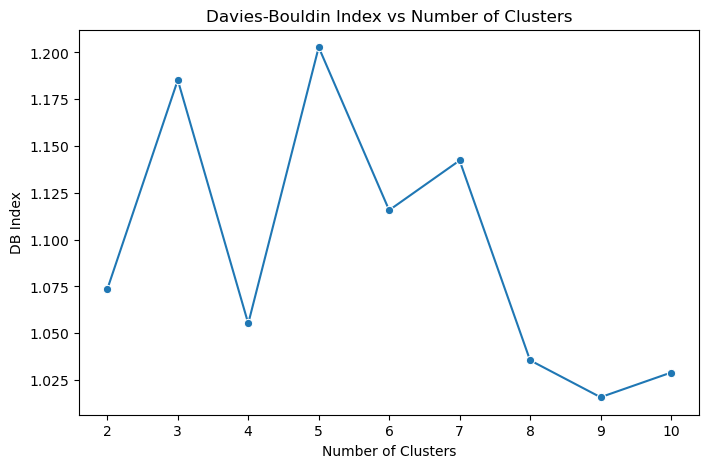

Optimal number of clusters based on DB Index: 9


C:\Users\iamsa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


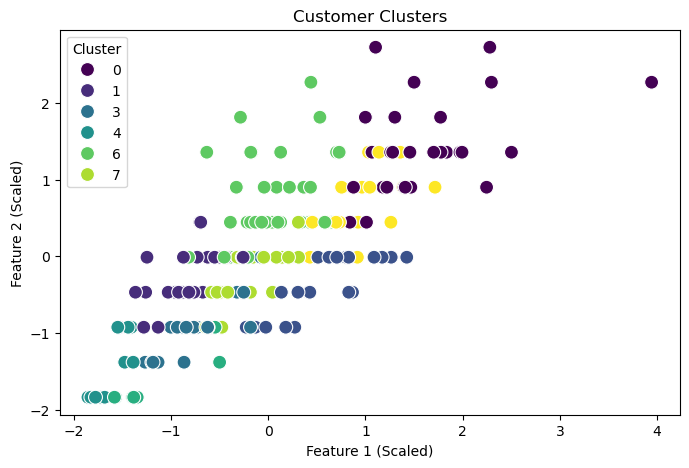

Davies-Bouldin Index for final clustering: 1.0158571508225327
Cluster assignments saved to 'Customer_Clusters.csv'


In [2]:
#Task 3: Customer Segmentation / Clustering

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers_url = 'https://drive.google.com/uc?id=1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE'
products_url = 'https://drive.google.com/uc?id=1IKuDizVapw-hyktwfpoAoaGtHtTNHfd0'
transactions_url = 'https://drive.google.com/uc?id=1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF'

customers = pd.read_csv(customers_url)
products = pd.read_csv(products_url)
transactions = pd.read_csv(transactions_url)

# Merge datasets
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

# Feature Engineering
customer_features = merged_data.groupby('CustomerID').agg(
    total_spending=('TotalValue', 'sum'),
    num_transactions=('TransactionID', 'count'),
    avg_transaction_value=('TotalValue', 'mean'),
    num_categories=('Category', 'nunique')
).reset_index()

# Normalize features
scaler = StandardScaler()
normalized_features = scaler.fit_transform(customer_features.iloc[:, 1:])

# Determine optimal number of clusters using DB Index
db_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(normalized_features)
    db_index = davies_bouldin_score(normalized_features, cluster_labels)
    db_scores.append((k, db_index))

# Plot DB Index vs. Number of Clusters
db_df = pd.DataFrame(db_scores, columns=['Clusters', 'DB_Index'])
plt.figure(figsize=(8, 5))
sns.lineplot(x='Clusters', y='DB_Index', data=db_df, marker='o')
plt.title("Davies-Bouldin Index vs Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("DB Index")
plt.show()

# Choose the optimal number of clusters (minimum DB Index)
optimal_clusters = db_df.loc[db_df['DB_Index'].idxmin(), 'Clusters']
print(f"Optimal number of clusters based on DB Index: {optimal_clusters}")

# Perform Clustering with Optimal Clusters
kmeans = KMeans(n_clusters=int(optimal_clusters), random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(normalized_features)

# Visualize Clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=normalized_features[:, 0],
    y=normalized_features[:, 1],
    hue=customer_features['Cluster'],
    palette='viridis',
    s=100
)
plt.title("Customer Clusters")
plt.xlabel("Feature 1 (Scaled)")
plt.ylabel("Feature 2 (Scaled)")
plt.legend(title="Cluster")
plt.show()

# Clustering Metrics
final_db_index = davies_bouldin_score(normalized_features, customer_features['Cluster'])
print(f"Davies-Bouldin Index for final clustering: {final_db_index}")

# Save Cluster Assignments
customer_features[['CustomerID', 'Cluster']].to_csv('Customer_Clusters.csv', index=False)
print("Cluster assignments saved to 'Customer_Clusters.csv'")
